In [64]:
import pandas as pd
import numpy as np
#import glob
#import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from wordcloud import WordCloud

# Working on Tweets Dataset

In [65]:
#all_tweets = glob.glob("/home/hammad/Workdir/FYP/Dataset/Tweets/*.csv")

In [66]:
#tweets_dataset = pd.concat((pd.read_csv(f) for f in all_tweets))
tweets_dataset= pd.read_csv('/home/hammad/Dropbox/University of Hertfordshire/FYP Project/Dataset/elonmusk_tweets.csv', parse_dates=["created_at"])


In [67]:
tweets_dataset.head()

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [68]:
tweets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          2819 non-null   int64         
 1   created_at  2819 non-null   datetime64[ns]
 2   text        2819 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 66.2+ KB


In [69]:
#tweets_data = tweets_dataset[['date','tweet']]
tweets_data = tweets_dataset[['created_at','text']] # drop the id column

In [70]:
tweets_data.head()

,created_at,text
0,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [71]:
#tweets_data['datetime'] = pd.to_datetime(tweets_data['created_at'])

In [72]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  2819 non-null   datetime64[ns]
 1   text        2819 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 44.2+ KB


In [73]:
df =  tweets_data

In [74]:
df['Index'] = df.index

In [75]:
df = tweets_data.set_index('created_at')

In [76]:
df

,text,Index
created_at,,
2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...,0
2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",1
2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",2
2017-04-03 16:30:19,b'Stormy weather in Shortville ...',3
2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",4
...,...,...
2011-12-03 08:22:07,b'That was a total non sequitur btw',2814
2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than T...",2815
2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co...,2816


In [77]:
df1 = df.between_time('16:00', '00:00')
df1

,text,Index
created_at,,
2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",1
2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",2
2017-04-03 16:30:19,b'Stormy weather in Shortville ...',3
2017-04-01 18:44:01,"b""Why did we waste so much time developing sil...",8
2017-04-01 18:39:09,b'Technology breakthrough: turns out chemtrail...,9
...,...,...
2011-12-27 19:54:15,b'RT @TheOnion: Vending Machine Attendant Admi...,2793
2011-12-26 16:29:50,b'Walked around a neighborhood recently rebuil...,2794
2011-12-26 16:23:04,"b""It was Xmas, so we brought presents for the ...",2795


In [78]:
#df2=tweets_data.between_time('00:01', '09:00')
#df2

In [79]:
#df = pd.concat([df1, df2])

In [80]:
df['created_at']=df.index # copying all the index values in to new column named created_at
df1['created_at']=df1.index # copying all the index values in to new column named created_at
df=df.set_index('Index') # Setting Index column as index
df1=df1.set_index('Index') # Setting Index column as index

/tmp/ipykernel_4589/1703534820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['created_at']=df1.index # copying all the index values in to new column named created_at


In [81]:
df = df[['created_at', 'text']]
df

,created_at,text
Index,,
0,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."
...,...,...
2814,2011-12-03 08:22:07,b'That was a total non sequitur btw'
2815,2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than T..."
2816,2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co...


In [82]:
df1 = df1[['created_at', 'text']]
df1

,created_at,text
Index,,
1,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
8,2017-04-01 18:44:01,"b""Why did we waste so much time developing sil..."
9,2017-04-01 18:39:09,b'Technology breakthrough: turns out chemtrail...
...,...,...
2793,2011-12-27 19:54:15,b'RT @TheOnion: Vending Machine Attendant Admi...
2794,2011-12-26 16:29:50,b'Walked around a neighborhood recently rebuil...
2795,2011-12-26 16:23:04,"b""It was Xmas, so we brought presents for the ..."


In [85]:
df2 = df1['created_at'] + timedelta(days=1) - timedelta(hours=9) # changing date to next day and shifting hours back to 4PM

In [86]:
df2

Index
1      2017-04-04 11:01:01
2      2017-04-04 07:59:35
3      2017-04-04 07:30:19
8      2017-04-02 09:44:01
9      2017-04-02 09:39:09
               ...        
2793   2011-12-28 10:54:15
2794   2011-12-27 07:29:50
2795   2011-12-27 07:23:04
2806   2011-12-22 14:17:11
2818   2010-06-05 09:31:57
Name: created_at, Length: 1381, dtype: datetime64[ns]

In [87]:
tweets_data.update(df2)

In [12]:
#tweets_data["created_at"].min() , tweets_data["created_at"].max()

In [13]:
#tweets_data["created_at"].max()-tweets_data["created_at"].min()

In [14]:
#days = tweets_data['created_at'].dt.day_name()

In [15]:
#days_index = tweets_data['created_at'].dt.dayofweek
#tweets_data['days_name'] = days
#tweets_data['dayofWeek_index'] = days_index
#

In [16]:
#tweets_data.head()

In [17]:
#Sunday = tweets_data['created_at'].dt.dayofweek == 2





#result = tweets_data['created_at'].dt.dayofweek
#df10 =tweets_data[tweets_data.dt.dayofweek == 6] 
#tweets_data[tweets_data.index.dayofweek == 6]
#df10

In [18]:
saturday = pd.DataFrame() # created empty dataframe
sunday = pd.DataFrame() # created empty dataframe
saturday = tweets_data.loc[(tweets_data['created_at'].dt.dayofweek==5)] # separated all the saturday tweets
sunday = tweets_data.loc[(tweets_data['created_at'].dt.dayofweek==6)] # separated all the sunday tweets
#temp_df = tweets_data['created_at']

In [19]:
saturday

,created_at,text
8,2017-04-01 18:44:01,"b""Why did we waste so much time developing sil..."
9,2017-04-01 18:39:09,b'Technology breakthrough: turns out chemtrail...
10,2017-04-01 18:25:33,"b""RT @OpenAI: We've created the world's first ..."
11,2017-04-01 18:24:30,b'RT @ProfBrianCox: This is extremely importan...
12,2017-04-01 04:55:23,"b'@adamsbj Def P100D with Ludicrous+, although..."
...,...,...
2800,2011-12-24 01:41:33,b'The Russians are having some challenges with...
2801,2011-12-24 01:33:35,b'We had a long and interesting conversation o...
2802,2011-12-24 01:29:19,b'Kanye stopped by the SpaceX rocket factory t...
2814,2011-12-03 08:22:07,b'That was a total non sequitur btw'


In [20]:
#saturday=tweets_data[tweets_data.days_name=='Saturday']
#sunday=tweets_data[tweets_data.days_name=='Sunday']


In [21]:
sunday

,created_at,text
4,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."
5,2017-04-02 06:04:07,"b""@Lexxxzis It's just a helicopter in helicopt..."
6,2017-04-02 06:02:38,"b""@verge It won't matter"""
7,2017-04-02 04:57:31,b'@SuperCoolCube Pretty good'
103,2017-03-19 16:50:10,b'RT @SpaceX: Recovery teams en route to Drago...
...,...,...
2770,2012-01-01 20:33:16,b'We built powerful information weapons to fig...
2771,2012-01-01 16:54:27,"b""@FareedZakaria However, China's real estate ..."
2772,2012-01-01 16:49:40,"b""@FareedZakaria Yeah, 2012 will be great for ..."
2773,2012-01-01 16:40:27,b'My first prediction of 2012 has come true: o...


In [22]:
#sunday = sunday.drop(['days_name', 'dayofWeek_index'], axis=1)
#saturday = saturday.drop(['days_name', 'dayofWeek_index'], axis=1)

In [23]:

#from dateutil.parser import parse



In [24]:
newsundaydates = sunday['created_at'] + timedelta(days=1) # change the sunday date to monday
newsaturdaydates = saturday['created_at'] + timedelta(days=2) # change the saturday date to monday

In [25]:
sunday['created_at'] = newsundaydates.values # updated the sunday new dates to dataframe 
saturday['created_at'] = newsaturdaydates.values # updated the saturday dates to dataframe

/tmp/ipykernel_6349/3256950631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunday['created_at'] = newsundaydates.values # updated the sunday new dates to dataframe
/tmp/ipykernel_6349/3256950631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturday['created_at'] = newsaturdaydates.values # updated the saturday dates to dataframe


In [26]:
saturday

,created_at,text
8,2017-04-03 18:44:01,"b""Why did we waste so much time developing sil..."
9,2017-04-03 18:39:09,b'Technology breakthrough: turns out chemtrail...
10,2017-04-03 18:25:33,"b""RT @OpenAI: We've created the world's first ..."
11,2017-04-03 18:24:30,b'RT @ProfBrianCox: This is extremely importan...
12,2017-04-03 04:55:23,"b'@adamsbj Def P100D with Ludicrous+, although..."
...,...,...
2800,2011-12-26 01:41:33,b'The Russians are having some challenges with...
2801,2011-12-26 01:33:35,b'We had a long and interesting conversation o...
2802,2011-12-26 01:29:19,b'Kanye stopped by the SpaceX rocket factory t...
2814,2011-12-05 08:22:07,b'That was a total non sequitur btw'


In [27]:
sunday

,created_at,text
4,2017-04-03 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."
5,2017-04-03 06:04:07,"b""@Lexxxzis It's just a helicopter in helicopt..."
6,2017-04-03 06:02:38,"b""@verge It won't matter"""
7,2017-04-03 04:57:31,b'@SuperCoolCube Pretty good'
103,2017-03-20 16:50:10,b'RT @SpaceX: Recovery teams en route to Drago...
...,...,...
2770,2012-01-02 20:33:16,b'We built powerful information weapons to fig...
2771,2012-01-02 16:54:27,"b""@FareedZakaria However, China's real estate ..."
2772,2012-01-02 16:49:40,"b""@FareedZakaria Yeah, 2012 will be great for ..."
2773,2012-01-02 16:40:27,b'My first prediction of 2012 has come true: o...


In [28]:
#tweets_data = tweets_data.drop(['days_name', 'dayofWeek_index'], axis=1)

In [29]:
#tweets = pd.concat()

In [30]:
tweets_data.update(newsundaydates) # updated the dataframe with new values
tweets_data.update(newsaturdaydates)
#tweets_data['created_at'] = newsundaydates.values
#tweets_data['created_at'] = newsaturdaydates.values

/tmp/ipykernel_6349/2931647585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data.update(newsundaydates) # updated the dataframe with new values
/tmp/ipykernel_6349/2931647585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data.update(newsaturdaydates)


In [31]:
tweets_data # updated dataframe with no saturday and sunday dates

,created_at,text
0,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,2017-04-03 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."
...,...,...
2814,2011-12-05 08:22:07,b'That was a total non sequitur btw'
2815,2011-12-05 08:20:28,"b'Great Voltaire quote, arguably better than T..."
2816,2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co...
2817,2011-12-01 09:55:11,"b""Went to Iceland on Sat to ride bumper cars o..."


In [126]:
tweets_data = tweets_data.set_index('created_at')

In [127]:
tweets_data

,text
created_at,
2017-04-05 14:56:29,robot spared humanity
2017-04-03 20:01:01,orin efcon exactly tesla absurdly overvalued b...
2017-04-03 16:59:35,efcon walt
2017-04-03 16:30:19,stormy weather shortville
2017-04-03 06:05:23,erge coal dying nat gas fracking basically dead
...,...
2011-12-05 08:22:07,total sequitur
2011-12-05 08:20:28,great voltaire quote arguably better twain hea...
2011-12-01 10:29:04,made volume model go now just need work miniat...


In [32]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/hammad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/hammad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/hammad/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [117]:
#print(stopwords.words('english'))
#print(len(stopwords.words('english')))
StopWords = stopwords.words('english')

removewords = ['but','because','until','during','before','after','more','most','no','not','nor', 'only','own','same',
         'very','can','wil','just',"don't",'should','now', "couldn't","didn't", "doesn't","hadn't", 'won']
for words in removewords:
    if words in StopWords:
        StopWords.remove(words)

StopWords.extend(['due', 'et','sat','http', 'https', 'com', '@[\w]+','b', 'none', 'non', 'jujqwfcv', 'basically'
                  'btw', 'altmossberg', 'aveleebbc', 'ims', 'co','dtype','hea','tu', 'v', 'wmcnt'])       
#print('#########################################')
#print(StopWords)
#print(len(StopWords))


In [118]:
# This function will remove the unnecessary symbols, stopwords, and stem the words to tokens.
def clean_string(review):
    review = re.sub('@[a-zA-Z]', ' ', review) # remove hastags with @
    review = re.sub('#[a-zA-Z]', ' ', review) # remove hastags with #
    review = re.sub('[^a-zA-Z]', ' ', review) # remove every thing except alphabets 
    review = review.lower() # lower case all the tweets
    review = review.split()
    #ps = PorterStemmer()
    wnl = nltk.WordNetLemmatizer()
    review = [wnl.lemmatize(word) for word in review if not word in set(StopWords)]
    review = ' '.join(review)
    return review

In [119]:
corpus = tweets_data['text'].apply(clean_string) # applying the cleaning function

In [120]:
print(corpus)
type(corpus)
string = str(corpus)

0                                   robot spared humanity
1       orin efcon exactly tesla absurdly overvalued b...
2                                              efcon walt
3                               stormy weather shortville
4         erge coal dying nat gas fracking basically dead
                              ...                        
2814                                       total sequitur
2815    great voltaire quote arguably better twain hea...
2816    made volume model go now just need work miniat...
2817    went iceland ride bumper car ice no not countr...
2818    please ignore prior tweet someone pretending a...
Name: text, Length: 2819, dtype: object


In [121]:
tweets_data.update(corpus)


/tmp/ipykernel_6349/2394790757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data.update(corpus)


In [122]:
tweets_data

,created_at,text
0,2017-04-05 14:56:29,robot spared humanity
1,2017-04-03 20:01:01,orin efcon exactly tesla absurdly overvalued b...
2,2017-04-03 16:59:35,efcon walt
3,2017-04-03 16:30:19,stormy weather shortville
4,2017-04-03 06:05:23,erge coal dying nat gas fracking basically dead
...,...,...
2814,2011-12-05 08:22:07,total sequitur
2815,2011-12-05 08:20:28,great voltaire quote arguably better twain hea...
2816,2011-12-01 10:29:04,made volume model go now just need work miniat...
2817,2011-12-01 09:55:11,went iceland ride bumper car ice no not countr...


In [123]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(string)

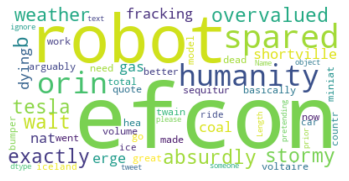

In [124]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [ ]:
#days = tweets_data['created_at'].dt.day_name()
#days_index = tweets_data['created_at'].dt.dayofweek
#tweets_data['days_name'] = days
#tweets_data['dayofWeek_index'] = days_index


# Working on Stock Dataset

In [ ]:
stock_dataset = pd.read_csv('/home/hammad/Dropbox/University of Hertfordshire/FYP Project/Dataset/TSLA.csv')

In [ ]:
stock_dataset.head()

In [ ]:
stock_dataset.info()

In [ ]:
stock_dataset.describe()